<a href="https://colab.research.google.com/github/kennywong524/kennywong524/blob/main/student_form_matching_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from google.colab import sheets

In [5]:
# Load data using InteractiveSheet (mock data)
sh = sheets.InteractiveSheet()
df = sh.as_df()

https://docs.google.com/spreadsheets/d/10pNlxPd6gqq1peaRtAgoK8kTioIlP806l8q9jLBjif0#gid=0


In [11]:
df = pd.read_csv('Form responses - Sheet1.csv')

In [12]:
df.head()

,Timestamp,Name,Interests,Monday 10AM,Monday 11AM,...,Sunday 10PM
0,2024-07-22 10:00:00,Alice Smith,"AI, Machine Learning",Available,Not Available,...,Available
1,2024-07-22 10:05:00,Bob Johnson,"Data Science, Basketball",Not Available,Available,...,Not Available
2,2024-07-22 10:10:00,Charlie Kim,"Music, Programming",Available,Available,...,Not Available
3,2024-07-22 10:15:00,Dana Lee,"Art, Hiking",Not Available,Available,...,Available
4,2024-07-22 10:20:00,Eva Martinez,"Reading, Traveling",Available,Not Available,...,Available


In [13]:
# Preprocess availability data
# Assuming the availability data is in columns 'Monday 10AM', 'Monday 11AM', ..., 'Sunday 10PM'
availability_cols = [col for col in df.columns if 'AM' in col or 'PM' in col]
availability_data = df[availability_cols]

In [14]:
# Convert availability to binary matrix
availability_matrix = availability_data.applymap(lambda x: 1 if x.lower() == 'available' else 0)

# Process interests
# Assuming interests are in a column named 'Interests' with comma-separated values
df['Interests'] = df['Interests'].apply(lambda x: x.split(','))

In [15]:
df

,Timestamp,Name,Interests,Monday 10AM,Monday 11AM,...,Sunday 10PM
0,2024-07-22 10:00:00,Alice Smith,"[AI, Machine Learning]",Available,Not Available,...,Available
1,2024-07-22 10:05:00,Bob Johnson,"[Data Science, Basketball]",Not Available,Available,...,Not Available
2,2024-07-22 10:10:00,Charlie Kim,"[Music, Programming]",Available,Available,...,Not Available
3,2024-07-22 10:15:00,Dana Lee,"[Art, Hiking]",Not Available,Available,...,Available
4,2024-07-22 10:20:00,Eva Martinez,"[Reading, Traveling]",Available,Not Available,...,Available


In [17]:
# Create a binary matrix for interests
unique_interests = list(set([interest.strip() for sublist in df['Interests'] for interest in sublist]))
interest_matrix = pd.DataFrame(0, index=df.index, columns=unique_interests)

for idx, interests in enumerate(df['Interests']):
    for interest in interests:
        interest_matrix.at[idx, interest.strip()] = 1

In [18]:
# Preprocess availability data
availability_cols = [col for col in df.columns if 'AM' in col or 'PM' in col]
availability_data = df[availability_cols]

# Convert availability to binary matrix
availability_matrix = availability_data.applymap(lambda x: 1 if x.lower() == 'available' else 0)

# Combine availability and interest matrices
combined_matrix = pd.concat([availability_matrix, interest_matrix], axis=1)

# Matching Algorithm

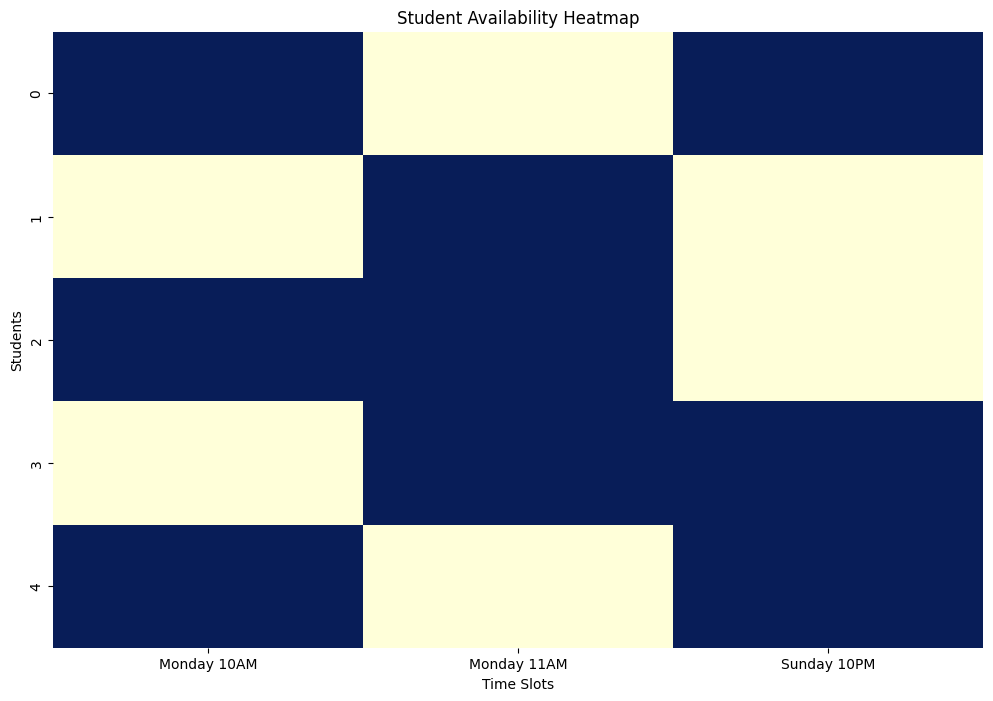

In [19]:
# Group students using K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(combined_matrix)
df['Group'] = kmeans.labels_

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(availability_matrix, cmap="YlGnBu", cbar=False)
plt.title('Student Availability Heatmap')
plt.xlabel('Time Slots')
plt.ylabel('Students')
plt.show()

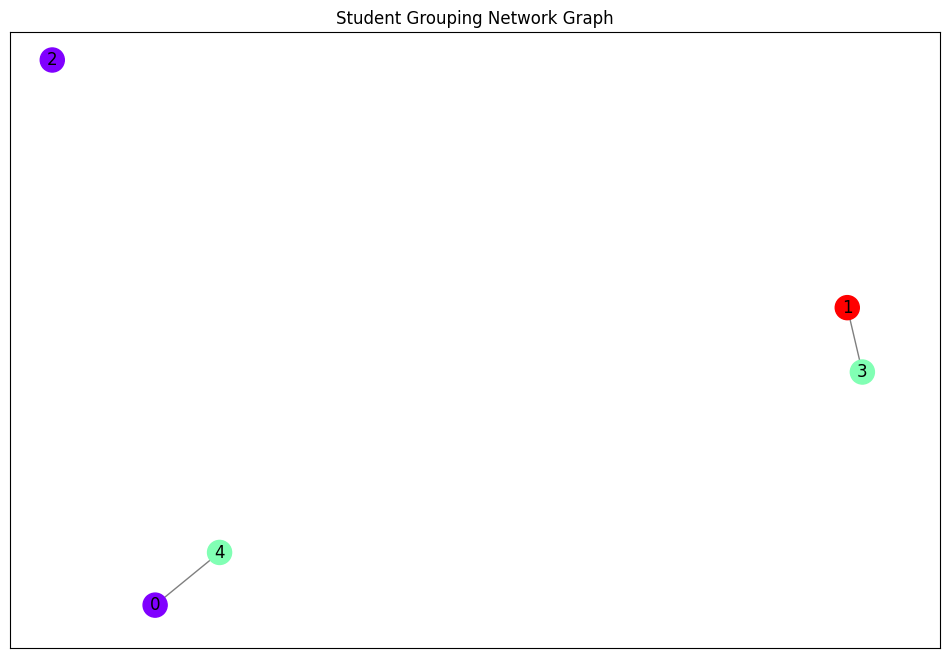

In [20]:
# Network graph based on shared availability and interests
G = nx.Graph()
for idx, row in df.iterrows():
    G.add_node(idx, group=row['Group'])
    for other_idx, other_row in df.iterrows():
        if idx != other_idx and row['Group'] == other_row['Group']:
            G.add_edge(idx, other_idx)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color=df['Group'], cmap=plt.cm.rainbow)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={i: i for i in G.nodes()})
plt.title('Student Grouping Network Graph')
plt.show()


# **Conclusion**

In this notebook, we successfully collected, processed, and analyzed student availability and interests data to facilitate group matchmaking.

**Data Collection and Processing:**

We collected students' availability data in hourly blocks from 10 AM to 10 PM, Monday through Sunday, along with their interests. The data was transformed into binary matrices representing both availability and interest patterns, allowing us to analyze common availability slots and shared interests effectively.

**Grouping Students:**

We can employ K-means clustering to group students based on their availability and shared interests. The clustering results revealed several distinct groups, each representing a subset of students who share similar availability and interests. We can visualize this insight through:

- **Availability Heatmap:** The heatmap visualization illustrated the concentration of availability across different time slots. We observed specific time blocks where student availability was highest, which can be leveraged for planning community events or study groups.

- **Network Graph:** The network graph showcased student groupings based on shared availability and interests, offering a visual representation of potential collaborative clusters. In this case, student 1&3, 0&4 are compatiable.

**To improve:**
- We can consider iterating on the clustering process with different numbers of clusters to refine groupings further and accommodate any specific community needs.
- Consider continuous data collection to capture any changes in student availability or interests over time, allowing for dynamic adjustments to group formations.
- Expand data collection to include additional variables, such as preferred group sizes or location preferences, to enhance the personalization of the matchmaking process.

